In [13]:
import torch
import torchvision
from torchvision import transforms, utils, models
from torch.utils.data import DataLoader

import psycopg2,datetime,heapq

import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt

import os

from sklearn.manifold import TSNE

import seaborn as sns



In [14]:

conn = psycopg2.connect(database="trademark1", user="tm_root", password="roottm_9823a", host="trueint.lu.im.ntu.edu.tw", port="5433")
cur = conn.cursor()

In [15]:
%%time
caseno_list = []
cur.execute("SELECT trademark.caseno, trademark.doc, rcc.Class, rcp.FileName, rcc.goods_denomination \
            FROM trademark  INNER JOIN  rcc ON (trademark.caseno = rcc.caseno) \
             INNER JOIN rcp ON ( trademark.caseno = rcp.caseno  ) \
where doc='TrademarkRegXMLB_048005' or doc='TrademarkRegXMLB_048004' or doc='TrademarkRegXMLB_048003' \
        or doc='TrademarkRegXMLB_048002' or doc='TrademarkRegXMLB_048001' \
        or doc='TrademarkRegXMLB_047024' or doc='TrademarkRegXMLB_047023' or doc='TrademarkRegXMLB_047022' \
        or doc='TrademarkRegXMLB_047021' or doc='TrademarkRegXMLB_047020' or doc='TrademarkRegXMLB_047019' \
        or doc='TrademarkRegXMLB_047018' or doc='TrademarkRegXMLB_047017' or doc='TrademarkRegXMLB_047016'")
r = cur.fetchall()


CPU times: user 98.6 ms, sys: 4.27 ms, total: 103 ms
Wall time: 304 ms


In [4]:
# caseno_list += [i for i in r]
# len(caseno_list)

In [5]:
# data = pd.DataFrame(caseno_list, columns=['caseno', 'doc', 'class', 'filename','goods_denomination'])
# data['path'] = '/service/trademark/raw_data/XMLB/' + data.doc+ '/' + data.filename
# data.dropna(inplace=True)



In [6]:
# data.describe()

In [7]:
# os.mkdir('./img_representaion')
# for i in range(1,46):
#     os.mkdir('./img_representaion/' + str(i))

# for i, j, k in zip(data['filename'], data['path'], data['class']):
#     im = Image.open(j)
#     im.save('./img_representaion/{}/'.format(int(k))  +i.split('/')[1])


In [8]:
# data.to_csv('img_index.csv', index=False)


## Load image

In [9]:
# img_data = torchvision.datasets.ImageFolder('./img_representaion',
# transform=transforms.Compose([
#     transforms.Resize(256),
#     transforms.CenterCrop(224),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
# ])
#                                             )

In [17]:
# data_loader = torch.utils.data.DataLoader(img_data, batch_size=300,shuffle=False)
# print(len(data_loader))

208


In [18]:
# def show_batch(imgs):
#     grid = utils.make_grid(imgs)
#     plt.imshow(grid.numpy().transpose((1, 2, 0)))
#     plt.title('Batch from dataloader')

In [ ]:
# for i, (batch_x, batch_y) in enumerate(data_loader):
#     if(i<4):
#         print(i, batch_x.size(),batch_y.size())
#         show_batch(batch_x)
#         plt.axis('off')
#         plt.show()
#     else:
#          break

In [22]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = models.resnet50(pretrained=True)
# model.eval()
# model.training

False

In [23]:
# model.to(device)
# model.training

False

In [ ]:
# model

In [35]:
# %%time
# img_vectors = []
# with torch.no_grad():
#     for i, (x, y) in enumerate(data_loader):
#         x = x.to(device)
#         out = model(x).cpu().numpy()
#         y = y.numpy().reshape(-1,1)+1
#         # print(np.concatenate((out, y), axis=1))
#         # print(y)
#         img_vectors.append(np.concatenate((out, y), axis=1))
#         # if i % == 0:
#         print(i*data_loader.batch_size, end='/')
        
        

0/300/600/900/1200/1500/1800/2100/2400/2700/3000/3300/3600/3900/4200/4500/4800/5100/5400/5700/6000/6300/6600/6900/7200/7500/7800/8100/8400/8700/9000/9300/9600/9900/10200/10500/10800/11100/11400/11700/12000/12300/12600/12900/13200/13500/13800/14100/14400/14700/15000/15300/15600/15900/16200/16500/16800/17100/17400/17700/18000/18300/18600/18900/19200/19500/19800/20100/20400/20700/21000/21300/21600/21900/22200/22500/22800/23100/23400/23700/24000/24300/24600/24900/25200/25500/25800/26100/26400/26700/27000/27300/27600/27900/28200/28500/28800/29100/29400/29700/30000/30300/30600/30900/31200/31500/31800/32100/32400/32700/33000/33300/33600/33900/34200/34500/34800/35100/35400/35700/36000/36300/36600/36900/37200/37500/37800/38100/38400/38700/39000/39300/39600/39900/40200/40500/40800/41100/41400/41700/42000/42300/42600/42900/43200/43500/43800/44100/44400/44700/45000/45300/45600/45900/46200/46500/46800/47100/47400/47700/48000/48300/48600/48900/49200/49500/49800/50100/50400/50700/51000/51300/51600/51

In [39]:
# img_vectors = np.vstack(img_vectors)

In [53]:
# np.savetxt('./img_vectors.csv', img_vectors[:, :-1], delimiter=',')
# np.savetxt('./img_class.csv', img_vectors[:,-1], delimiter=',')

In [32]:
# np.concatenate((img_vectors[0], img_vectors[1]), axis=0).shape

(200, 1000)

In [3]:
img_vectors = np.genfromtxt('./img_vectors.csv', delimiter=',')
classlist = np.genfromtxt('./img_class.csv', delimiter=',')

In [5]:
data = pd.read_csv('img_index.csv')

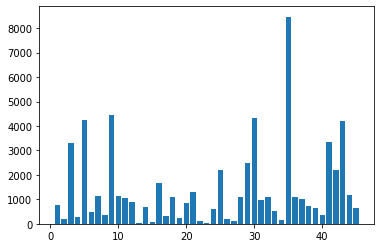

In [6]:

plt.bar(x=data['class'].value_counts().index, height = data['class'].value_counts().values)
plt.show()

In [8]:
plt.style.use('dark_background')

## t-SNE

In [80]:
%%time
tsne_vec_euc = TSNE(n_components=2,  metric='euclidean',n_jobs=-1, perplexity=30).fit_transform(img_vectors)

CPU times: user 2h 3min 5s, sys: 3.11 s, total: 2h 3min 8s
Wall time: 21min 44s


In [81]:
 np.savetxt('./tsne_vec_euc.csv',tsne_vec_euc, delimiter=',')

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

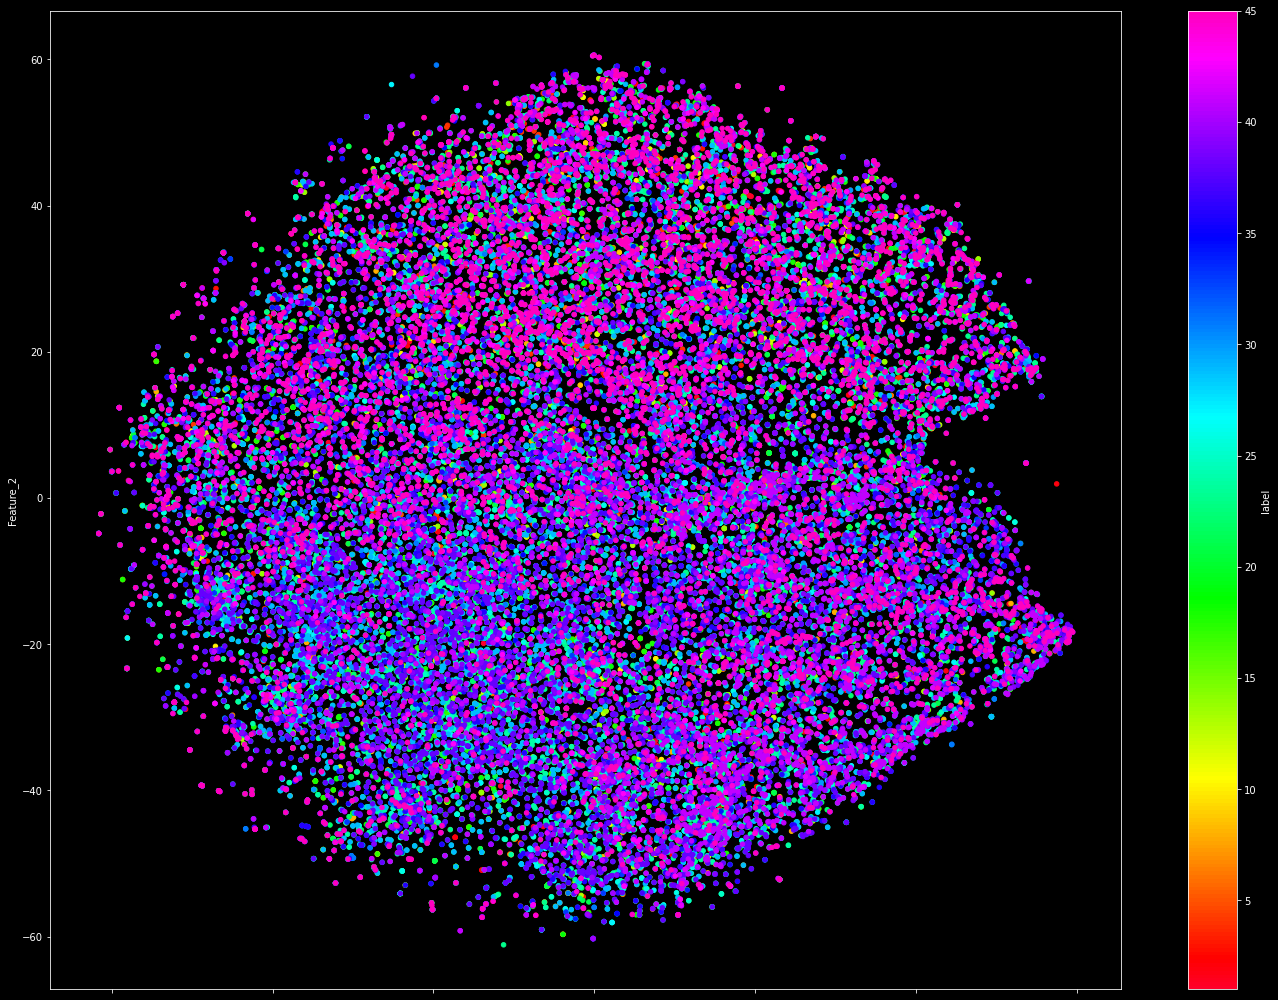

In [9]:
tsne_vec_euc = np.genfromtxt('./tsne_vec_euc.csv', delimiter=',')
df = pd.DataFrame(dict(Feature_1=tsne_vec_euc[:,0], Feature_2=tsne_vec_euc[:,1], label=classlist))
df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='gist_rainbow', figsize=(24, 18))

In [ ]:
%%time
tsne_vec_cos = TSNE(n_components=2,  metric='cosine',n_jobs=-1, perplexity=30).fit_transform(img_vectors)

In [20]:
 np.savetxt('./tsne_vec_cos.csv',tsne_vec_cos, delimiter=',')

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

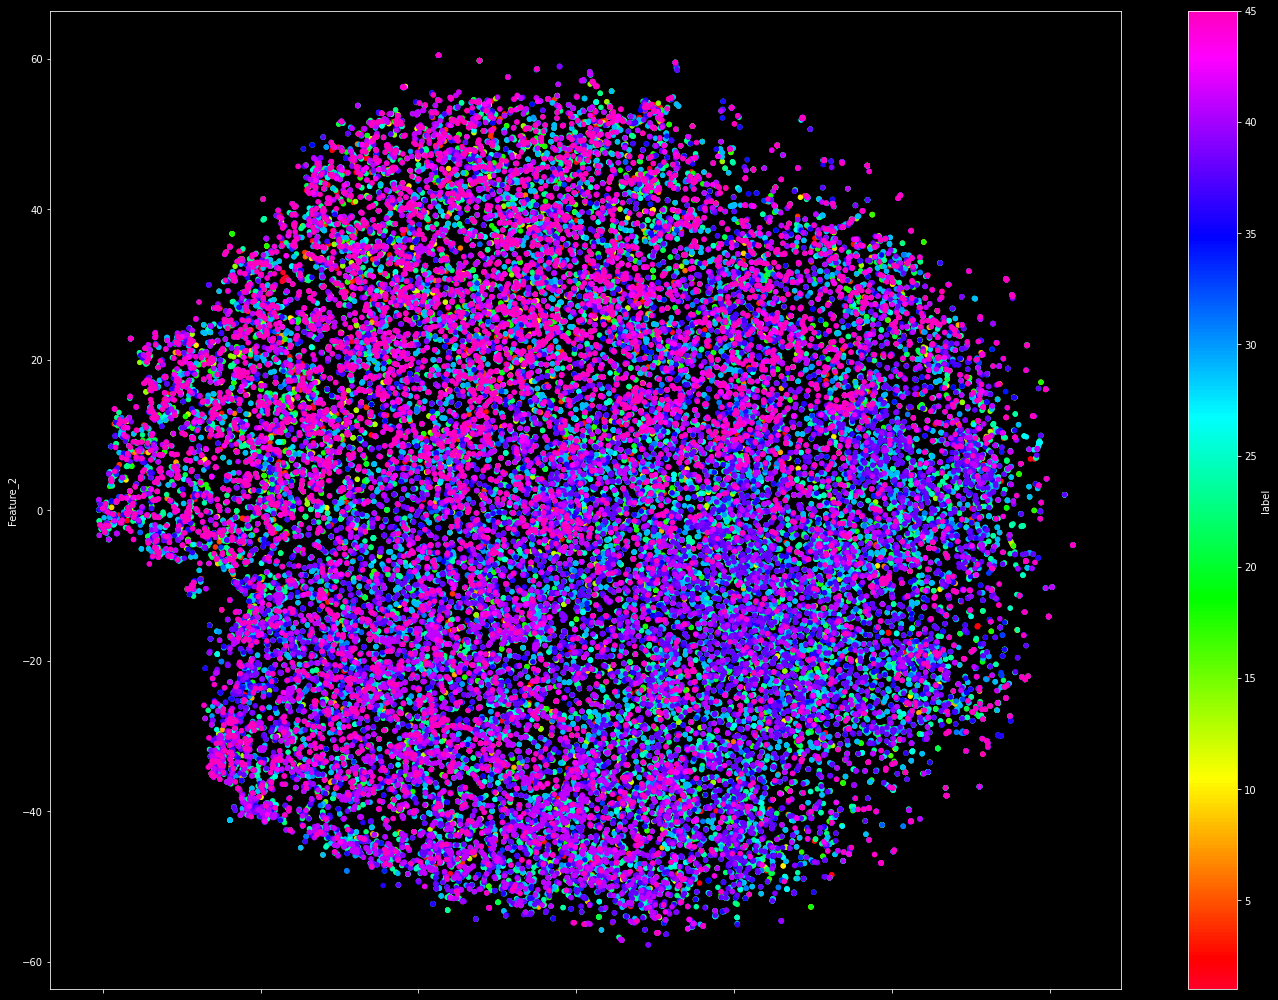

In [11]:
tsne_vec_cos = np.genfromtxt('./tsne_vec_cos.csv', delimiter=',')
df = pd.DataFrame(dict(Feature_1=tsne_vec_cos[:,0], Feature_2=tsne_vec_cos[:,1], label=classlist))
df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='gist_rainbow', figsize=(24,18))

In [67]:
%%time
tsne_vec_jaccard = TSNE(n_components=2,  metric='jaccard',n_jobs=-1, perplexity=30).fit_transform(img_vectors)


CPU times: user 2h 52min 34s, sys: 8.15 s, total: 2h 52min 42s
Wall time: 30min 4s


In [68]:
 np.savetxt('./tsne_vec_jaccard.csv',tsne_vec_jaccard, delimiter=',')

<AxesSubplot:xlabel='Feature_1', ylabel='Feature_2'>

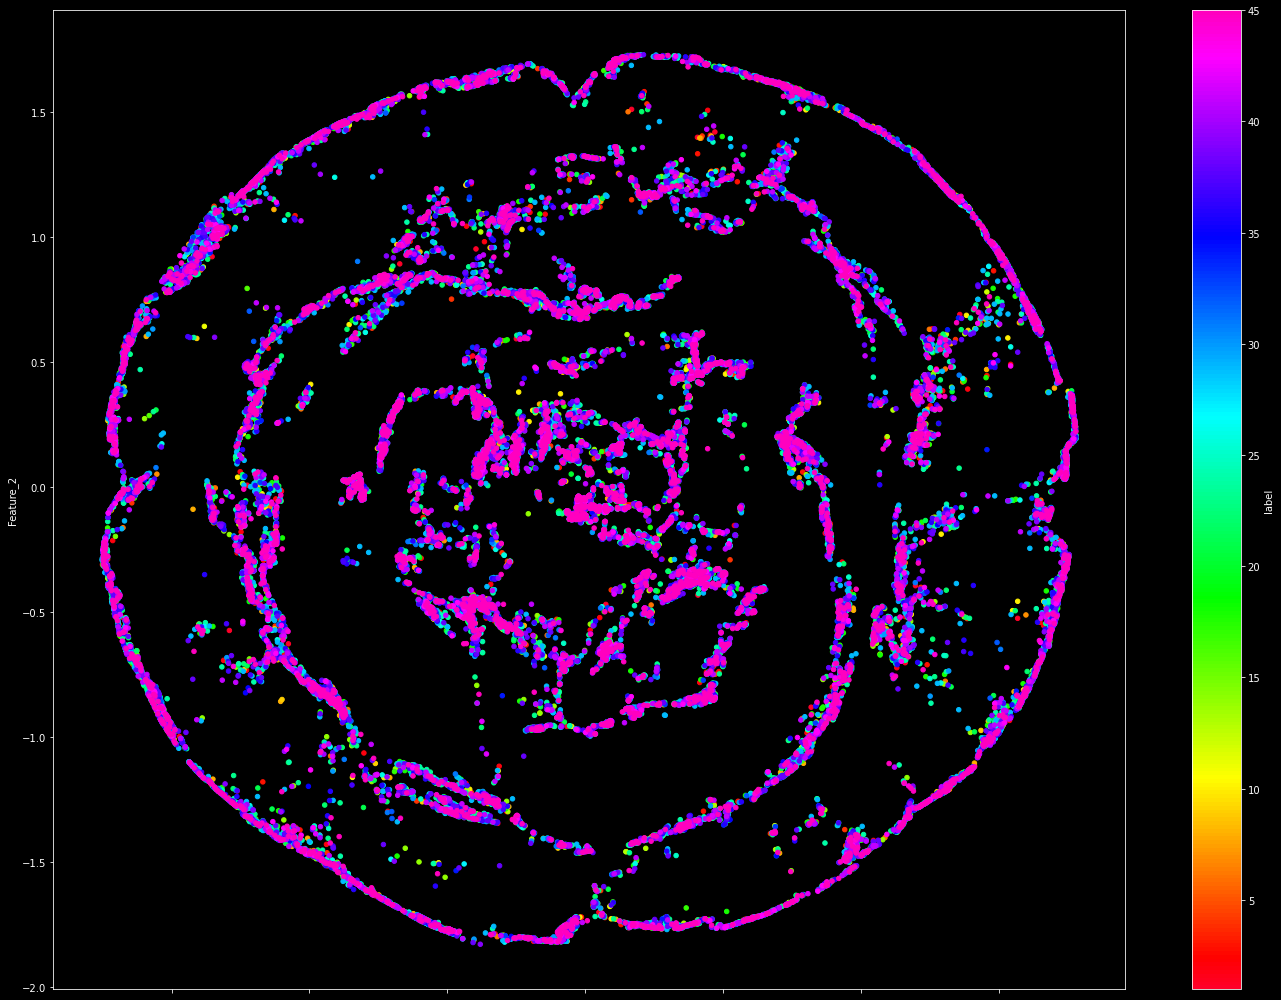

In [12]:
tsne_vec_jaccard = np.genfromtxt('./tsne_vec_jaccard.csv', delimiter=',')
df = pd.DataFrame(dict(Feature_1=tsne_vec_jaccard[:,0], Feature_2=tsne_vec_jaccard[:,1], label=classlist))
df.plot(x="Feature_1", y="Feature_2", kind='scatter', c='label', colormap='gist_rainbow', figsize=(24,18))